## Read data and perform Random Shuffle
First prepare the UCI Iris dataset. Iris is a very classic dataset that is often used to teach and test various algorithms

random.shuffle cannot operate the dataframe format directly. Therefore, the dataframe must be converted to the list or array format first.
In addition, each section of this report needs to be randomly seeded to ensure that the results are reproducible.

In [3]:
import numpy as np
import pandas as pd
import random
### Set random seed to ensure that subsequent randomness can be repeated
random.seed(324)
### The.data file is a comma-separated file that can be read by read_csv
df=pd.read_csv('./iris/iris.data',header=None)
###The random.shuffle() method can only be used for data in list or array format
### Data is converted to both formats
df_array=np.array(df)
random.shuffle(df_array)
### Here the rows in the table have been scrambled
iris=pd.DataFrame(df_array,columns=['sepal_length','sepal_width','petal_length','petal_width','class'])## Add col_name
print(iris)

    sepal_length sepal_width petal_length petal_width           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.7         3.2          1.3         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         2.5          5.8         1.8  Iris-virginica
146          6.3         3.4          5.6         2.4  Iris-virginica
147          5.1         3.3          1.7         0.5     Iris-setosa
148          6.9         3.2          5.7         2.3  Iris-virginica
149          5.0         3.5          1.6         0.6     Iris-setosa

[150 rows x 5 columns]


Remove the class column because it is not needed

In [4]:
### Remove the class column because it is not needed
iris=iris.iloc[:,0:4]
print(iris)

    sepal_length sepal_width petal_length petal_width
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.7         3.2          1.3         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         2.5          5.8         1.8
146          6.3         3.4          5.6         2.4
147          5.1         3.3          1.7         0.5
148          6.9         3.2          5.7         2.3
149          5.0         3.5          1.6         0.6

[150 rows x 4 columns]


 ### Initialization of the cluster center
Shuffle the dataset randomly and choose the first K points. 
Note that the dataset contains 3 classes, so we set K = 3 for the simplicity.
利用 random.randiant()函数生成k个随机数然后在数据集中随机抽取

In [6]:
random.seed(33)
###Generate three random numbers
k_index=[]
for i in range(0,3):
    x=random.randint(0,len(iris))
    k_index.append(x)
print(k_index) ## generates indexes of first K points
first_k_point=iris.iloc[k_index,:]
print(first_k_point)

[146, 42, 59]
    sepal_length sepal_width petal_length petal_width
146          6.3         3.4          5.6         2.4
42           4.4         2.9          1.4         0.2
59           5.1         3.4          1.5         0.2


This report choose to use Euclidean distance:

$$D_n=\sqrt{\sum_{i=1}^n{{(x_i-y_i)^2}}}$$


### Clustering
This report requires the use of kmeans algorithm, the algorithm flow of kmeans algorithm is as follows:

1. First, select k initial points

2. Calculate the distance between each sample point and the center point

3. Select the nearest sample point according to the distance

4. Add new sample points to the cluster

5. Calculate the mean of all points in the cluster and update the center point

6. Repeat the above operation until the mean within each clust is no longer changing, that is, the center point is no longer changing



In [7]:
def compute_distance(point1, point2):  # Calculate Euclidean distance
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [8]:
def k_means(data,k,seed):
###Set random seeds to ensure recurrence
    random.seed(seed) 
###Converts the data format to array    
    data=np.array(data.values)
###Initial cluster center
    center={}
    count=len(data) #Count the number of instants
###enumerate() function is used to convert an traversable data object (such as a list, tuple, or string)
###Combine into an index sequence, listing both data and data subscripts
    for ki , i in enumerate(random.sample(range(count),k)):
        center[ki]=data[i]  ###Write first_point to the dictionary for subsequent updates
    while True :
        clusters={}
        for i in range(k):
            clusters[i]=[] ###Clear dict for easy refresh
        
        for i1 in data:  
            distance_list=[] 
            for i2 in center:
                ###Calculate the distance between the center and the sample point
                d=compute_distance(i1,center[i2])
                distance_list.append(d)
            ki=np.argmin(distance_list) ###Add the nearest point
            ###argmin() Specifies the index of the minimum value in the array
            clusters[ki].append(i1) ###Add the sample to the ki cluster
        pre_center=center.copy() #The previous center point needs to be recorded as a stop condition
        
        for c in clusters.keys():
            ###Reset the center point and replace it with the mean point
            center[c]=np.mean(clusters[c],axis=0)
        end=True
        for c in center:
            if compute_distance(pre_center[c],center[c])>0:
                end=False ###If the cluster center changes, continue
                break
        if end==True: ###If the mean doesn't change then stop
            break
    return center,clusters

k_means(iris,3,5)

({0: array([6.2973684210526315, 2.8631578947368417, 4.8500000000000005,
         1.531578947368421], dtype=object),
  1: array([4.747761194029852, 3.1731343283582087, 1.4522388059701492,
         0.2208955223880596], dtype=object),
  2: array([5.268888888888889, 3.7155555555555564, 1.4711111111111108,
         0.2755555555555555], dtype=object)},
 {0: [array([5.7, 2.8, 4.5, 1.3], dtype=object),
   array([6.6, 2.9, 4.6, 1.3], dtype=object),
   array([6.8, 2.8, 4.8, 1.4], dtype=object),
   array([6.8, 2.8, 4.8, 1.4], dtype=object),
   array([6.1, 2.9, 4.7, 1.4], dtype=object),
   array([6.0, 2.7, 5.1, 1.6], dtype=object),
   array([5.6, 2.5, 3.9, 1.1], dtype=object),
   array([6.4, 3.2, 4.5, 1.5], dtype=object),
   array([6.3, 3.3, 4.7, 1.6], dtype=object),
   array([5.5, 2.4, 3.8, 1.1], dtype=object),
   array([5.5, 2.5, 4.0, 1.3], dtype=object),
   array([7.1, 3.0, 5.9, 2.1], dtype=object),
   array([5.7, 2.8, 4.5, 1.3], dtype=object),
   array([6.2, 2.9, 4.3, 1.3], dtype=object),
   a

## Plot scatter plots
Use matplotlib.pyplot to plot scatter plots and use different colors depending on species or clusters

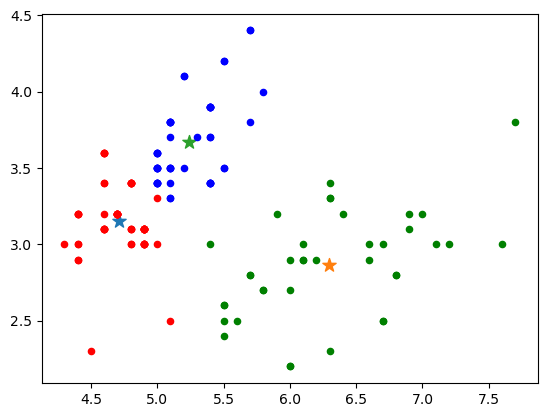

In [9]:
import matplotlib.pyplot as plt 
k1,points1=k_means(iris,3,14)
for i in k1:
    plt.scatter(k1[i][0],k1[i][1],marker='*',s=100)
colors =['r','g','b','m','c','y']
for c in points1:
    for p in points1[c]:
        plt.scatter(p[0],p[1],c=colors[c],s=20)

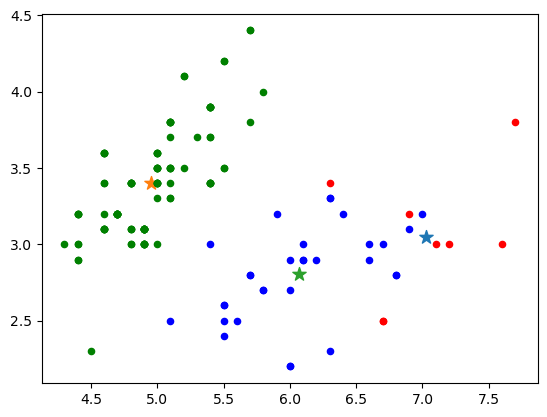

In [10]:
import matplotlib.pyplot as plt 
k,points=k_means(iris,3,6)
for i in k:
    plt.scatter(k[i][0],k[i][1],marker='*',s=100)
colors =['r','g','b','m','c','y']
for c in points:
    for p in points[c]:
        plt.scatter(p[0],p[1],c=colors[c],s=20)

### Original Graph

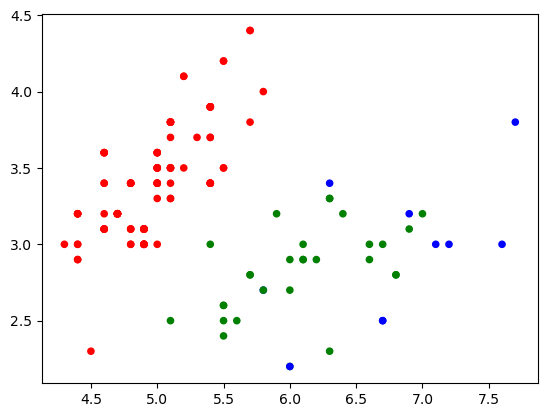

In [11]:
df=pd.read_csv('./iris/iris.data',header=None)
iris_graph=pd.DataFrame(df_array,columns=['sepal_length','sepal_width','petal_length','petal_width','class'])##添加col_name
x_axis = iris_graph['sepal_length']
y_axis = iris_graph['sepal_width']
 
#c指定点的颜色，当c赋值为数值时，会根据值的不同自动着色
color_map = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
colors = iris_graph['class'].map(color_map)
c = iris_graph['class'].map(color_map)
plt.scatter(x_axis, y_axis,c=c,s=20)
plt.show()

As can be seen from the three graphs drawn above, the clustering effect of different initial points is very different, some effect is very good, and some effect is very poor. Therefore, when carrying out kmeans clustering, different central points should be selected as far as possible to try the calculation several times, and the results with the best effect should be selected for analysis.

###  Clustering Measurement

Themutual information between the predicted cluster Ω and the true class C is computed by

$$ I(\Omega,C) = \sum_{k,j}{P(w_k\cap c_j)log\frac{P(w_k\cap c_j)}{P(w_k)\cap P(c_j)}} $$

 where $P(ω_k)$, $P(c_j)$ and $P(ω_k\cap c_j)$ are the probabilities of the instance being in the cluster $ω_k$, in the
 class $c_j$, and in the intersection of $ω_k$ and $c_j$, respectively.





We choose the second clustering result with good effect to calculate the NMI value

In [12]:
###View each cluster and the number of samples in each category
print(len(points[0]),len(points[1]),len(points[2]))
print(len(iris_graph.values))

8 111 31
150


### Compute $P(w_{ik})$

In [13]:
P_wik=[]
for i in points:
    P_wik.append(len(points[i])/len(iris.values))
print(P_wik)


[0.05333333333333334, 0.74, 0.20666666666666667]


### Comput $P(c_{ij})$

In [13]:
print(iris_graph.groupby('class').count())
P_cij=[]
for i in [111,29,10]:
    P_cij.append(i/len(iris_graph.values))
print(P_cij)

                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa               111          111           111          111
Iris-versicolor            29           29            29           29
Iris-virginica             10           10            10           10
[0.74, 0.19333333333333333, 0.06666666666666667]


### Compute $P(w_k\cap c_j)$


Because python can't compute the intersection of two-dimensional arrays, you can use tuple() to convert the elements in the list into tuples

In [14]:
###将原数据按照不同的iris种类分组
setosa=iris_graph.loc[iris_graph['class']=='Iris-setosa',:].iloc[:,0:-1]
versicolor=iris_graph.loc[iris_graph['class']=='Iris-versicolor',:].iloc[:,0:-1]
virginica=iris_graph.loc[iris_graph['class']=='Iris-virginica',:].iloc[:,0:-1]
class_list=[setosa,versicolor,virginica]

Turn it into a two-dimensional list first

In [24]:
set_1=[]
for c in class_list:
    k=np.array(c).tolist()
    sub_set=[]
    for i in k:
        sub_set.append(tuple(j for j in i))
    set_1.append(sub_set)
print(set_1)
print(len(set_1[0]),len(set_1[1]),len(set_1[2]))

[[(5.1, 3.5, 1.4, 0.2), (4.9, 3.0, 1.4, 0.2), (4.7, 3.2, 1.3, 0.2), (4.7, 3.2, 1.3, 0.2), (5.0, 3.6, 1.4, 0.2), (4.7, 3.2, 1.3, 0.2), (5.1, 3.5, 1.4, 0.2), (5.0, 3.6, 1.4, 0.2), (4.6, 3.1, 1.5, 0.2), (4.9, 3.0, 1.4, 0.2), (4.9, 3.1, 1.5, 0.1), (4.9, 3.0, 1.4, 0.2), (4.9, 3.1, 1.5, 0.1), (4.8, 3.4, 1.6, 0.2), (4.8, 3.4, 1.6, 0.2), (5.8, 4.0, 1.2, 0.2), (5.4, 3.9, 1.3, 0.4), (4.7, 3.2, 1.3, 0.2), (4.8, 3.0, 1.4, 0.1), (5.7, 4.4, 1.5, 0.4), (4.6, 3.1, 1.5, 0.2), (5.4, 3.7, 1.5, 0.2), (4.6, 3.6, 1.0, 0.2), (5.4, 3.9, 1.3, 0.4), (5.4, 3.9, 1.3, 0.4), (5.1, 3.7, 1.5, 0.4), (4.3, 3.0, 1.1, 0.1), (5.1, 3.3, 1.7, 0.5), (4.6, 3.1, 1.5, 0.2), (4.7, 3.2, 1.3, 0.2), (4.8, 3.4, 1.9, 0.2), (4.9, 3.1, 1.5, 0.1), (5.0, 3.4, 1.6, 0.4), (5.0, 3.4, 1.5, 0.2), (4.4, 2.9, 1.4, 0.2), (5.1, 3.5, 1.4, 0.3), (4.6, 3.6, 1.0, 0.2), (4.8, 3.4, 1.6, 0.2), (5.1, 3.8, 1.5, 0.3), (4.8, 3.1, 1.6, 0.2), (4.7, 3.2, 1.3, 0.2), (4.6, 3.1, 1.5, 0.2), (4.4, 2.9, 1.4, 0.2), (4.9, 3.1, 1.5, 0.1), (4.4, 3.0, 1.3, 0.2), (5.7, 4.

'Points' are samples divided by three clusters

In [16]:
np.array(points[0])

array([[7.1, 3.0, 5.9, 2.1],
       [7.6, 3.0, 6.6, 2.1],
       [6.7, 2.5, 5.8, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [7.2, 3.0, 5.8, 1.6],
       [6.7, 2.5, 5.8, 1.8],
       [6.3, 3.4, 5.6, 2.4],
       [6.9, 3.2, 5.7, 2.3]], dtype=object)

In [25]:
set_2=[]
for i in points:
    sub_set=[]
    k=np.array(points[i])  ###Convert a list to an array
    k1=k.tolist()
    for j in k1:
        k2=tuple(j)
        sub_set.append(k2)
    set_2.append(sub_set)
print(set_2)


[[(7.1, 3.0, 5.9, 2.1), (7.6, 3.0, 6.6, 2.1), (6.7, 2.5, 5.8, 1.8), (7.7, 3.8, 6.7, 2.2), (7.2, 3.0, 5.8, 1.6), (6.7, 2.5, 5.8, 1.8), (6.3, 3.4, 5.6, 2.4), (6.9, 3.2, 5.7, 2.3)], [(5.1, 3.5, 1.4, 0.2), (4.9, 3.0, 1.4, 0.2), (4.7, 3.2, 1.3, 0.2), (4.7, 3.2, 1.3, 0.2), (5.0, 3.6, 1.4, 0.2), (4.7, 3.2, 1.3, 0.2), (5.1, 3.5, 1.4, 0.2), (5.0, 3.6, 1.4, 0.2), (4.6, 3.1, 1.5, 0.2), (4.9, 3.0, 1.4, 0.2), (4.9, 3.1, 1.5, 0.1), (4.9, 3.0, 1.4, 0.2), (4.9, 3.1, 1.5, 0.1), (4.8, 3.4, 1.6, 0.2), (4.8, 3.4, 1.6, 0.2), (5.8, 4.0, 1.2, 0.2), (5.4, 3.9, 1.3, 0.4), (4.7, 3.2, 1.3, 0.2), (4.8, 3.0, 1.4, 0.1), (5.7, 4.4, 1.5, 0.4), (4.6, 3.1, 1.5, 0.2), (5.4, 3.7, 1.5, 0.2), (4.6, 3.6, 1.0, 0.2), (5.4, 3.9, 1.3, 0.4), (5.4, 3.9, 1.3, 0.4), (5.1, 3.7, 1.5, 0.4), (4.3, 3.0, 1.1, 0.1), (5.1, 3.3, 1.7, 0.5), (4.6, 3.1, 1.5, 0.2), (4.7, 3.2, 1.3, 0.2), (4.8, 3.4, 1.9, 0.2), (4.9, 3.1, 1.5, 0.1), (5.0, 3.4, 1.6, 0.4), (5.0, 3.4, 1.5, 0.2), (4.4, 2.9, 1.4, 0.2), (5.1, 3.5, 1.4, 0.3), (4.6, 3.6, 1.0, 0.2), (4.8, 

At this point, we convert the two two-dimensional lists into arraylists, so that we can perform intersection operations. According to the arrangement, there should be 3*3=9 intersections.
respectivel:y

cluster1&setosa, cluster1&versicolor, cluster1&virginica,cluster2&setosa, cluster2&versicolor, cluster2&virginica....cluster3&virginica
Using the function Counter(), you can quickly get the number of occurrences of each element in the list..

In [46]:
###Using the function Counter(), you can quickly get the number of occurrences of each element in the list
from collections import Counter 
Counter(set_1[0])

Counter({(4.9, 3.1, 1.5, 0.1): 9,
         (4.7, 3.2, 1.3, 0.2): 8,
         (4.9, 3.0, 1.4, 0.2): 6,
         (4.6, 3.1, 1.5, 0.2): 5,
         (4.8, 3.4, 1.6, 0.2): 5,
         (5.0, 3.6, 1.4, 0.2): 4,
         (5.4, 3.9, 1.3, 0.4): 4,
         (4.6, 3.6, 1.0, 0.2): 4,
         (5.0, 3.5, 1.3, 0.3): 4,
         (4.4, 3.2, 1.3, 0.2): 4,
         (5.0, 3.4, 1.6, 0.4): 3,
         (4.8, 3.1, 1.6, 0.2): 3,
         (5.1, 3.8, 1.6, 0.2): 3,
         (5.4, 3.4, 1.7, 0.2): 3,
         (5.1, 3.5, 1.4, 0.2): 2,
         (5.7, 4.4, 1.5, 0.4): 2,
         (5.4, 3.7, 1.5, 0.2): 2,
         (5.1, 3.3, 1.7, 0.5): 2,
         (5.0, 3.4, 1.5, 0.2): 2,
         (4.4, 2.9, 1.4, 0.2): 2,
         (5.1, 3.5, 1.4, 0.3): 2,
         (4.4, 3.0, 1.3, 0.2): 2,
         (5.4, 3.4, 1.5, 0.4): 2,
         (5.5, 3.5, 1.3, 0.2): 2,
         (5.2, 4.1, 1.5, 0.1): 2,
         (5.5, 4.2, 1.4, 0.2): 2,
         (5.4, 3.9, 1.7, 0.4): 2,
         (4.6, 3.4, 1.4, 0.3): 2,
         (5.8, 4.0, 1.2, 0.2): 1,
         (4.8,

In [68]:
def p_matrix(data1,data2):
    ###Using the function Counter(),
    ###you can quickly get the number of occurrences of each element in the list
    from collections import Counter 
    p_m=[]
    for i in data1:
        sub_p_m=[]
        c_m=Counter(i)
        for j in data2:
            k=0
            for j2 in set(j):
                k=k+c_m[j2]
            sub_p_m.append(k)
        p_m.append(sub_p_m)
    return p_m
                  
wk_and_cij=p_matrix(set_1,set_2)     
print(wk_and_cij)

[[0, 111, 0], [0, 0, 29], [8, 0, 2]]


Because the sum of the intersection between the cluster and the original data should be the length of the original data set, we can verify whether the result of the operation is correct. It can be seen that the sum of the intersection is 150, indicating that the result is correct.

In [84]:
P_wkandcij=[]
for i in wk_and_cij:
    for j in i:
        p=j/len(iris) ###Calculated probability
        P_wkandcij.append(p)
print(P_wkandcij)


[0.0, 0.74, 0.0, 0.0, 0.0, 0.19333333333333333, 0.05333333333333334, 0.0, 0.013333333333333334]


# Compute NMI
NMI(Normalized Mutual Information).It is commonly used in clustering to measure the similarity of two cluster results (usually we compare the similarity between the cluster results and the real label). Its range is [0,1], and the higher the value, the more similar the two clusters are. Normalization refers to quantifying the similarity value of two clustering results to between 0 and 1. The calculation formula is as follows:

$$ NMI(\Omega,C)= \frac{I(\Omega,C)}{[H(\Omega)+H(C)]/2}   $$
where 
$ H(Ω) = − kP(ω_k)logP(ω_k)$ and $ H(C) = − \sum_j {P(c_j)logP(c_j)}. $



In [86]:
print(P_wik)
print(P_cij)
print(P_wkandcij)

[0.05333333333333334, 0.74, 0.20666666666666667]
[0.06666666666666667, 0.74, 0.19333333333333333]
[0.0, 0.74, 0.0, 0.0, 0.0, 0.19333333333333333, 0.05333333333333334, 0.0, 0.013333333333333334]


Note that each category corresponds to the category of data in the original dataset, and you can select the class that contains the most categories in the cluster sample to correspond!

For ease of calculation, convert the third list into a 3 by 3 matrix. This makes it easy to calculate the corresponding product.

In [88]:
m_wkandcj=np.array(P_wkandcij).reshape(3, 3)
print(m_wkandcj)

[[0.         0.74       0.        ]
 [0.         0.         0.19333333]
 [0.05333333 0.         0.01333333]]


In [127]:
###Here the corresponding order of sample types and clustering categories is different, 
###so it is necessary to unify the order
P_wik=[0.74,0.20666666666666667,0.05333333333333334]
P_cij=[0.06666666666666667,0.74,0.19333333333333333]

In [133]:
import math
def I_omega_c(pwk,pcj,pwicj):
    value=0
###You must pay attention to the order here, 
###otherwise the values will correspond incorrectly
    for i in range(len(pwk)):
        for j in range(len(pcj)):
            if pwicj[i,j]!=0:   ###Because you can't take a logarithm of 0
                value=pwicj[i,j]*math.log(pwicj[i,j]/(pwk[i]*pcj[j]))+value
    return value
                
i_oc=I_omega_c(P_wik,P_cij,m_wkandcj)
print(i_oc)

0.6754930114168995


### Compute NMI

#### Compute H(Ω) and H(C)

In [132]:
def h(l):
    value=0
    for i in l:
        value=value-i*math.log(i)
    return value
h_omega=h(P_wik)
h_c=h(P_cij)
print(h_omega,h_c)

0.704988707308607 0.7210667451281405


In [131]:
nmi=i_oc/(h_omega+h_c)*2
print(nmi)

0.9473586882791446


As can be seen from the above results, the NMI value of this clustering result is 0.94736, indicating that the clustering effect is very good, and the common information between the clustering result and the real category reaches 94%. The NMI value of the first cluster with poor effect can be calculated for comparison, and it is found that the NMI of the first cluster with poor effect is far less than 0.94.